In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow.python'

In [2]:
df = pd.read_csv('TSLA.csv')
df.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
2390,2019-12-30,85.758003,85.800003,81.851997,82.940002,82.940002,62932000
2391,2019-12-31,81.000000,84.258003,80.416000,83.666000,83.666000,51428500


In [3]:
df = df['Open'].values
df = df.reshape(-1,1)
print(df)
#df = df.reshape(-1,1)



[[ 5.      ]
 [ 4.6     ]
 [ 4.      ]
 ...
 [87.      ]
 [85.758003]
 [81.      ]]


In [34]:
df.shape

(2392, 1)

In [4]:
x_train = np.array(df[:int(df.shape[0]*0.8)])
x_test = np.array(df[int(df.shape[0]*0.8):])

In [38]:
x_train.shape
x_test.shape

(479, 1)

In [5]:
scaler = MinMaxScaler(feature_range = (0,1))

In [7]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [9]:
x_train.shape

(1913, 1)

In [10]:
x_test.shape

(479, 1)

In [11]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x= np.array(x)
    y = np.array(y)
    return x,y
        

In [12]:
x_train1, y_train1 = create_dataset(x_train)
x_test1, y_test1 = create_dataset(x_test)

In [14]:
y_train1.shape

(1863,)

In [15]:
x_train1.shape

(1863, 50)

In [16]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train1.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [17]:
x_train1 = np.reshape(x_train1, (x_train1.shape[0], x_train1.shape[1], 1))
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1))

In [18]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
model.fit(x_train1, y_train1, epochs=50, batch_size=32)


Epoch 1/50
59/59 [==============================] - 29s 253ms/step - loss: 0.0146
Epoch 2/50
59/59 [==============================] - 15s 254ms/step - loss: 0.0037
Epoch 3/50
59/59 [==============================] - 17s 282ms/step - loss: 0.0036
Epoch 4/50
59/59 [==============================] - 15s 253ms/step - loss: 0.0030
Epoch 5/50
59/59 [==============================] - 16s 279ms/step - loss: 0.0027
Epoch 6/50
59/59 [==============================] - 16s 266ms/step - loss: 0.0030
Epoch 7/50
59/59 [==============================] - 18s 308ms/step - loss: 0.0025
Epoch 8/50
59/59 [==============================] - 18s 303ms/step - loss: 0.0029
Epoch 9/50
59/59 [==============================] - 15s 262ms/step - loss: 0.0026
Epoch 10/50
59/59 [==============================] - 17s 284ms/step - loss: 0.0023
Epoch 11/50
59/59 [==============================] - 17s 293ms/step - loss: 0.0021
Epoch 12/50
59/59 [==============================] - 18s 299ms/step - loss: 0.0021
Epoch 13/50
5

In [20]:
model.save('Stock_Prediction.h5')

In [21]:
model = load_model('Stock_Prediction.h5')

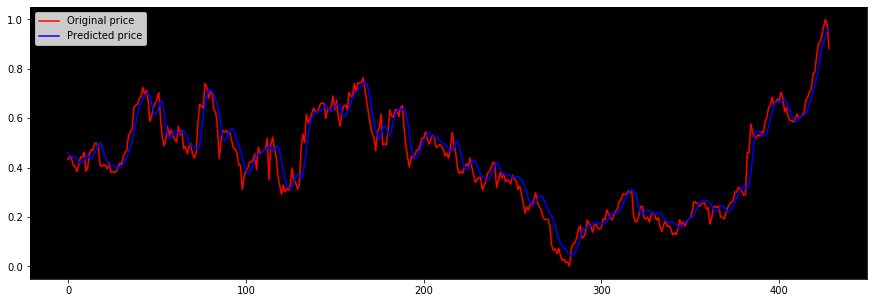

In [23]:
predictions = model.predict(x_test1)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test1.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(15,5))
ax.set_facecolor('black')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='blue', label='Predicted price')
plt.legend()